In [1]:
import cv2

In [2]:
image_data = cv2.imread("./resources/car2.jpg")

In a scenario in which we want our OpenCV results to be rendered inline with the notebook. We will need to resort to matplotlib.

For instance, if your running your notebook server in a remote machine, the line below will either raise an error or kill the kernel alltogether.

In [ ]:
cv2.imshow("Car Interior", image_data)

# ^-- this kills my kernel

So, we'll need to resort to the %matplotlib magic + pyplot

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

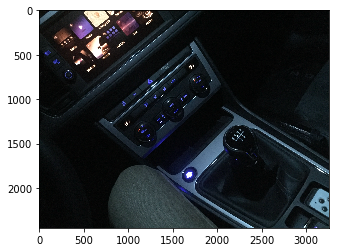

In [8]:
plt.imshow(image_data)

One quick and dirty way to not be always using "plt.imshow"
or to be able to copy and paste other people's example code is to override cv2.imshow with our own function.

In [11]:
def imshow(name, input, fig_size=None, cmap="gray"):
    """
    params:
        name - The "title" that would show on OpenCv window.
        input - the input data
        **the two params are the existing parameters in opencv.imshow**
        fig_size - receives a tuple for the image size to be printed in the notebook
        cmap - a matplotlib-compliant color map code to use in our image
    """
    ## by default, we'll infer the image rendering size by the input shape
    ## assuming a density of 80 dpi
    if fig_size is None:
        dpi = 80
        im_data = input
        try:
            height, width, depth = im_data.shape
        except:
            height, width = im_data.shape
        fig_size = width / float(dpi), height / float(dpi)

    try:
        input = cv2.cvtColor(input,cv2.COLOR_BGR2RGB)
    except :
        input = input

    import matplotlib.pyplot as plt
    %matplotlib inline    
    
    fig, ax = plt.subplots(figsize=fig_size)
    print("Showing Image: {}".format(name))
    ax.imshow(input, interpolation='none', aspect="auto", cmap=cmap)
    plt.show()

def override_imshow(cv2):
    ## from now on, cv2.imshow will call our function instead.
    cv2.imshow = imshow

In [12]:
## we'll pass our cv2 variable
override_imshow(cv2)

Showing Image: Car Interior


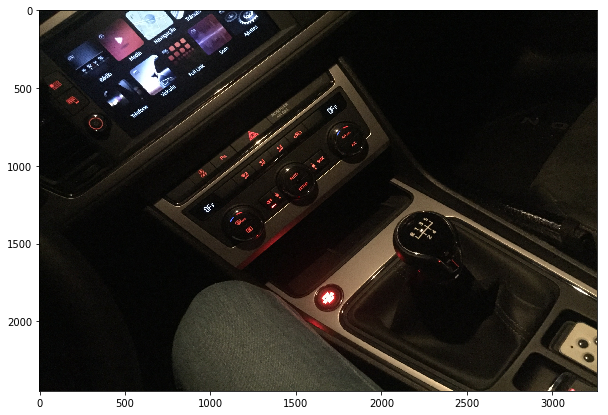

In [17]:
cv2.imshow("Car Interior", image_data, fig_size=(10,7))

Showing Image: Car Interior


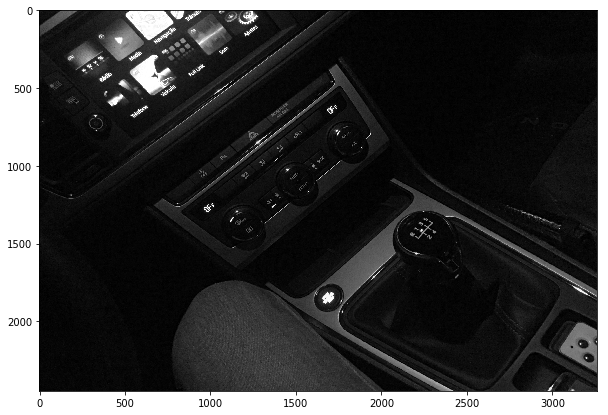

In [19]:
cv2.imshow("Car Interior", image_data[:,:,0], fig_size=(10,7))

Showing Image: Car Interior


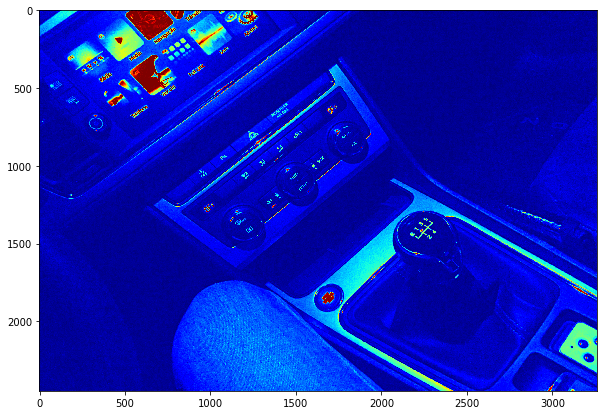

In [20]:
cv2.imshow("Car Interior", image_data[:,:,0], fig_size=(10,7), cmap="jet")

This set of functions or a similar enough ones can also be found in [this gist](https://gist.github.com/pjsousa/5dd693491c3ee7a4879ca06249e96d2a)